# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Danendra Dipa Dananjaya
- **Email:** danendrach@gmail.com
- **ID Dicoding:** danendradipa

## Menentukan Pertanyaan Bisnis

- Hari apa yang paling banyak terjadi penyewaan sepeda?
- Pada kondisi cuaca apa rata-rata penyewaan sepeda paling banyak terjadi?
- Pada musim apa rata-rata penyewaan sepeda paling banyak terjadi?
- Pada jam berapa paling banyak terjadi penyewaan sepeda?
- Bagaimana tren total penyewaan sepeda berubah setiap bulan pada tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [126]:
#memanggil table day dan menampilkan data

day_data = pd.read_csv("./dataset/day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [127]:
#memanggil table hour dan menampilkan data

hour_data = pd.read_csv("./dataset/hour.csv")
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [128]:
#memeriksa tipe data tiap kolom masing masing table

day_data.info()
hour_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [129]:
#memeriksa missing value tabel day
day_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [130]:
#memeriksa missing value tabel hour
hour_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value pada kedua tabel

In [131]:
#memeriksa jumlah duplikasi pada kedua tabel

print("Jumlah duplikasi tabel day: ", day_data.duplicated().sum())
print("Jumlah duplikasi tabel hour: ", hour_data.duplicated().sum())

Jumlah duplikasi tabel day:  0
Jumlah duplikasi tabel hour:  0


Tidak ada jumlah duplikasi pada kedua tabel

In [132]:
#Memeriksa parameter statistik dari tabel day
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [133]:
#Memeriksa parameter statistik dari tabel hour
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

##### Dropping

In [134]:
#Menghapus kolom yang tidak diperlukan yaitu kolom holiday

day_data.drop(columns=['holiday'], inplace=True)
hour_data.drop(columns=['holiday'], inplace=True)

##### Rename

In [135]:
#Mengganti nama kolom pada tabel day
day_data = day_data.rename(columns={'instant': 'record_index', 'dteday': 'date', 'season': 'season', 'yr': 'year', 'mnth': 'month', 'workingday': 'working_day', 'weathersit': 'weather', 'temp': 'temperature', 'atemp': 'feels_like_temp', 'hum': 'humidity', 'windspeed': 'wind_speed', 'casual': 'casual_users', 'registered': 'registered_users', 'cnt': 'total_count'})


In [136]:
#Mengganti nama kolom pada tabel hour
hour_data = hour_data.rename(columns={'instant': 'record_index', 'dteday': 'date', 'season': 'season', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'workingday': 'working_day', 'weathersit': 'weather', 'temp': 'temperature', 'atemp': 'feels_like_temp', 'hum': 'humidity', 'windspeed': 'wind_speed', 'casual': 'casual_users', 'registered': 'registered_users', 'cnt': 'total_count'})


##### Change data type

In [137]:
#Mengganti tipe data object ke datetime
day_data['date'] = pd.to_datetime(day_data['date'])
hour_data['date'] = pd.to_datetime(hour_data['date'])


In [138]:
#Mengganti tipe data ke kategori
change_columns = ['season', 'month', 'weekday', 'weather']

for column in change_columns:
    day_data[column] =  day_data[column].astype("category")
    hour_data[column] =  hour_data[column].astype("category")

Mengkonversi isi kolom yang sebelumnya angka menjadi isi kategori

In [139]:
# Konversi isi untuk musim
season_convert = {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

day_data['season'] = day_data['season'].map(season_convert)
hour_data['season'] = hour_data['season'].map(season_convert)

# Konversi isi untuk bulan
month_convert = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

day_data['month'] = day_data['month'].map(month_convert)
hour_data['month'] = hour_data['month'].map(month_convert)

# Konversi isi untuk Hari dalam Minggu
weekday_convert = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}

day_data['weekday'] = day_data['weekday'].map(weekday_convert)
hour_data['weekday'] = hour_data['weekday'].map(weekday_convert)

# Konversi isi untuk Kondisi Cuaca
weather_convert = {
    1: 'Clear', 2: 'Mist_Cloudy', 3: 'Light_Rain', 4: 'Heavy_Rain'
}

day_data['weather'] = day_data['weather'].map(weather_convert)
hour_data['weather'] = hour_data['weather'].map(weather_convert)

## Exploratory Data Analysis (EDA)

### Explore Day_Data

In [140]:
day_data.describe(include= "all")

,record_index,date,season,year,month,weekday,working_day,weather,temperature,feels_like_temp,humidity,wind_speed,casual_users,registered_users,total_count
count,731.000000,731,731,731.000000,731,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,January,Sunday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,NaN,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,NaN,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,NaN,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,NaN,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,NaN,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,NaN,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari data diatas menunjukkan parameter statistik dari dataframe day_data dan mayoritas melakukan penyewaan pada musim Fall atau Gugur

In [141]:
#Menampilkan hari dan jumlah penyewaan yang terjadi
day_data.groupby('weekday')['total_count'].sum().reset_index()

,weekday,total_count
0,Sunday,444027
1,Monday,455503
2,Tuesday,469109
3,Wednesday,473048
4,Thursday,485395
5,Friday,487790
6,Saturday,477807


In [142]:
#Menampilkan musim dan jumlah penyewaan yang terjadi
day_data.groupby('season')['total_count'].sum().reset_index()

,season,total_count
0,Springer,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613


In [143]:
#Menampilkan cuaca dan jumlah penyewaan yang terjadi
day_data.groupby('weather')['total_count'].sum().reset_index()

,weather,total_count
0,Clear,2257952
1,Mist_Cloudy,996858
2,Light_Rain,37869


In [144]:
#Menampilkan bulan dan jumlah penyewaan yang terjadi
day_data.groupby('month')['total_count'].sum().reset_index()

,month,total_count
0,January,134933
1,February,151352
2,March,228920
3,April,269094
4,May,331686
5,June,346342
6,July,344948
7,August,351194
8,September,345991
9,October,322352


In [145]:
#menampilkan jumlah casual dan register user
casual_sum = day_data['casual_users'].sum()
registered_sum = day_data['registered_users'].sum()
print("jumlah casual:", casual_sum )
print("jumlah registered:", registered_sum )

jumlah casual: 620017
jumlah registered: 2672662


### Explore Hour_Data

In [146]:
hour_data.describe(include= "all")

,record_index,date,season,year,month,hour,weekday,working_day,weather,temperature,feels_like_temp,humidity,wind_speed,casual_users,registered_users,total_count
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,May,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,0.502561,NaN,11.546752,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,0.000000,NaN,6.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,1.000000,NaN,12.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,1.000000,NaN,18.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,1.000000,NaN,23.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari data diatas menunjukkan parameter statistik dari dataframe hour_data dan mayoritas melakukan penyewaan pada musim Fall atau Gugur

In [147]:
#Menampilkan jam dan jumlah penyewaan yang terjadi
hour_data.groupby('hour')['total_count'].sum().reset_index()

,hour,total_count
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


## Visualization & Explanatory Analysis

### Pertanyaan 1: Hari apa yang paling banyak terjadi penyewaan sepeda?

     weekday  total_count
0     Sunday       444027
1     Monday       455503
2    Tuesday       469109
3  Wednesday       473048
4   Thursday       485395
5     Friday       487790
6   Saturday       477807


<ipython-input-148-1123db899228>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_count, x='weekday', y='total_count', palette= ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3" ])


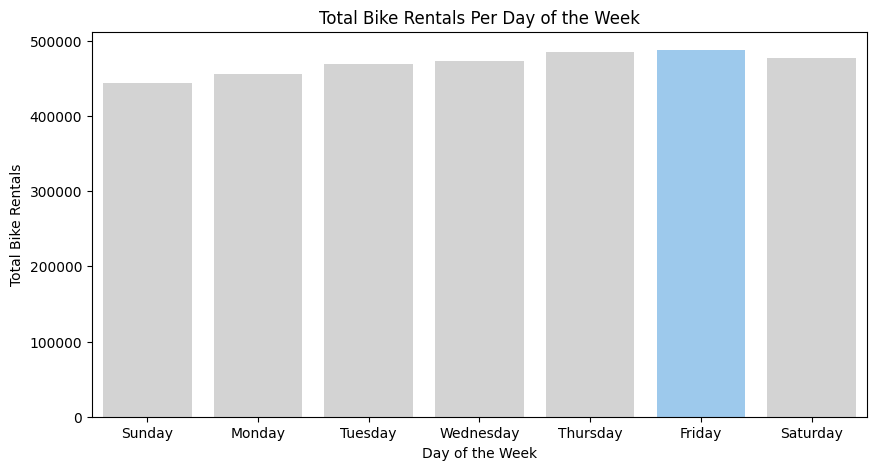

In [148]:
weekday_count = day_data.groupby('weekday')['total_count'].sum().reset_index()
print(weekday_count)

plt.figure(figsize=(10, 5))
sns.barplot(data=weekday_count, x='weekday', y='total_count', palette= ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3" ])
plt.title('Total Bike Rentals Per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bike Rentals')
plt.show()

Dapat dilihat pada grafik diatas untuk hari yang paling banyak terjadi penyewaan sepeda adalah hari "Jumat" dengan jumlah 487790 penyewaan

### Pertanyaan 2: Pada kondisi cuaca apa rata-rata penyewaan sepeda paling banyak terjadi?

       weather  avg_weather_count
0        Clear        4876.786177
1  Mist_Cloudy        4035.862348
2   Light_Rain        1803.285714


<ipython-input-149-83b326f1e45d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_count, x='weather', y='avg_weather_count', palette= ["#90CAF9", "#D3D3D3", "#D3D3D3"])


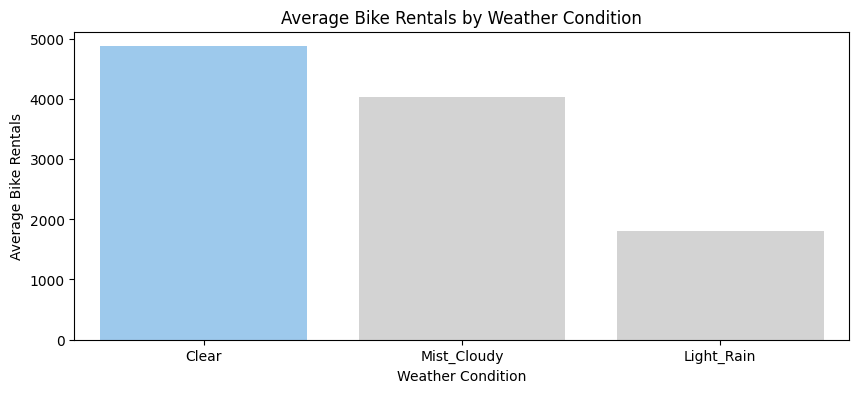

In [149]:
weather_count = day_data.groupby('weather')['total_count'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 4))
weather_count.rename(columns={
    "total_count": "avg_weather_count"
}, inplace=True)
print(weather_count)
sns.barplot(data=weather_count, x='weather', y='avg_weather_count', palette= ["#90CAF9", "#D3D3D3", "#D3D3D3"])
plt.title('Average Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Bike Rentals')
plt.show()

Dapat dilihat pada grafik diatas menunjukkan bahwa cuaca dengan rata rata penyewaan tertinggi yaitu pada cuaca "Clear" dengan rata rata sebesar 4876.78

### Pertanyaan 3: Pada musim apa rata-rata penyewaan sepeda paling banyak terjadi?


     season  avg_season_count
0      Fall       5644.303191
1    Summer       4992.331522
2    Winter       4728.162921
3  Springer       2604.132597


<ipython-input-150-df7f6f81732f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_count, x='season', y='avg_season_count', order=season_order, palette=["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3"])


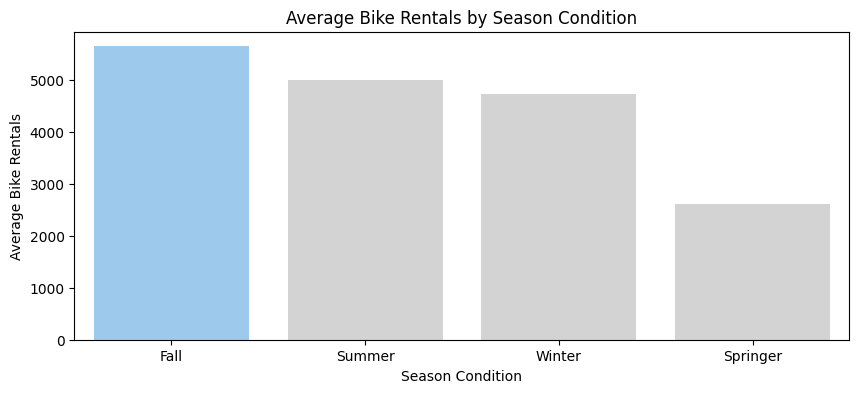

In [150]:
season_count = day_data.groupby('season')['total_count'].mean().sort_values(ascending=False).reset_index()

season_count.rename(columns={
    "total_count": "avg_season_count"
}, inplace=True)
print(season_count)

plt.figure(figsize=(10, 4))
season_order = season_count['season']
sns.barplot(data=season_count, x='season', y='avg_season_count', order=season_order, palette=["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3"])
plt.title('Average Bike Rentals by Season Condition')
plt.xlabel('Season Condition')
plt.ylabel('Average Bike Rentals')
plt.show()

Dapat dilihat pada grafik diatas menunjukkan bahwa musim dengan rata rata penyewaan tertinggi yaitu pada musim "Fall" dengan rata rata sebesar 5644.30

### Pertanyaan 4: Pada jam berapa paling banyak terjadi penyewaan sepeda?

   hour  total_count
0    17       336860
1    18       309772
2     8       261001
3    16       227748
4    19       226789


<ipython-input-151-1e8474f6ff02>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


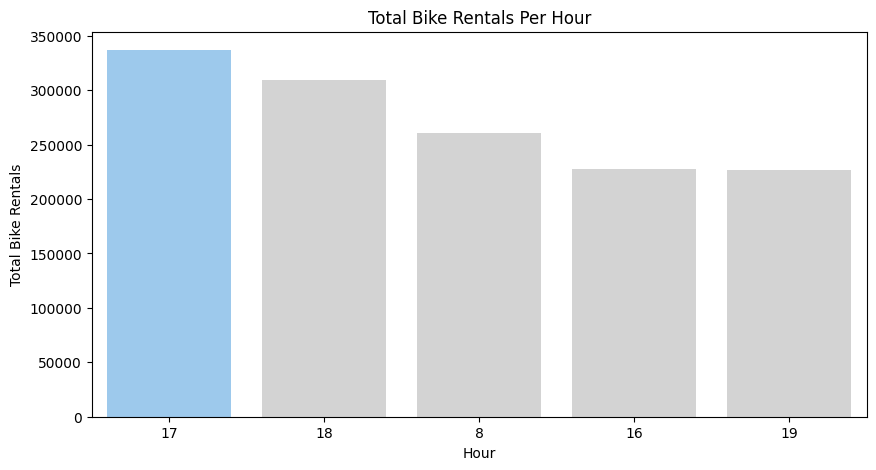

In [151]:
hourly_rentals = hour_data.groupby('hour')['total_count'].sum().sort_values(ascending=False).head().reset_index()
print(hourly_rentals)
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(
    data=hourly_rentals,
    x='hour',
    y='total_count',
    palette=["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"],
    ax=ax,
    order=hourly_rentals['hour']
)

ax.set_title('Total Bike Rentals Per Hour')
ax.set_xlabel('Hour')
ax.set_ylabel('Total Bike Rentals')

plt.show()

Jam dengan penyewaan terbanyak pada jam 17.00 dengan jumlah 336860 penyewaan

### Pertanyaan 5: Bagaimana tren total penyewaan sepeda berubah setiap bulan pada tahun 2011 dan 2012?

       date  total_count
0   2011-01        38189
1   2011-02        48215
2   2011-03        64045
3   2011-04        94870
4   2011-05       135821
5   2011-06       143512
6   2011-07       141341
7   2011-08       136691
8   2011-09       127418
9   2011-10       123511
10  2011-11       102167
11  2011-12        87323
       date  total_count
12  2012-01        96744
13  2012-02       103137
14  2012-03       164875
15  2012-04       174224
16  2012-05       195865
17  2012-06       202830
18  2012-07       203607
19  2012-08       214503
20  2012-09       218573
21  2012-10       198841
22  2012-11       152664
23  2012-12       123713


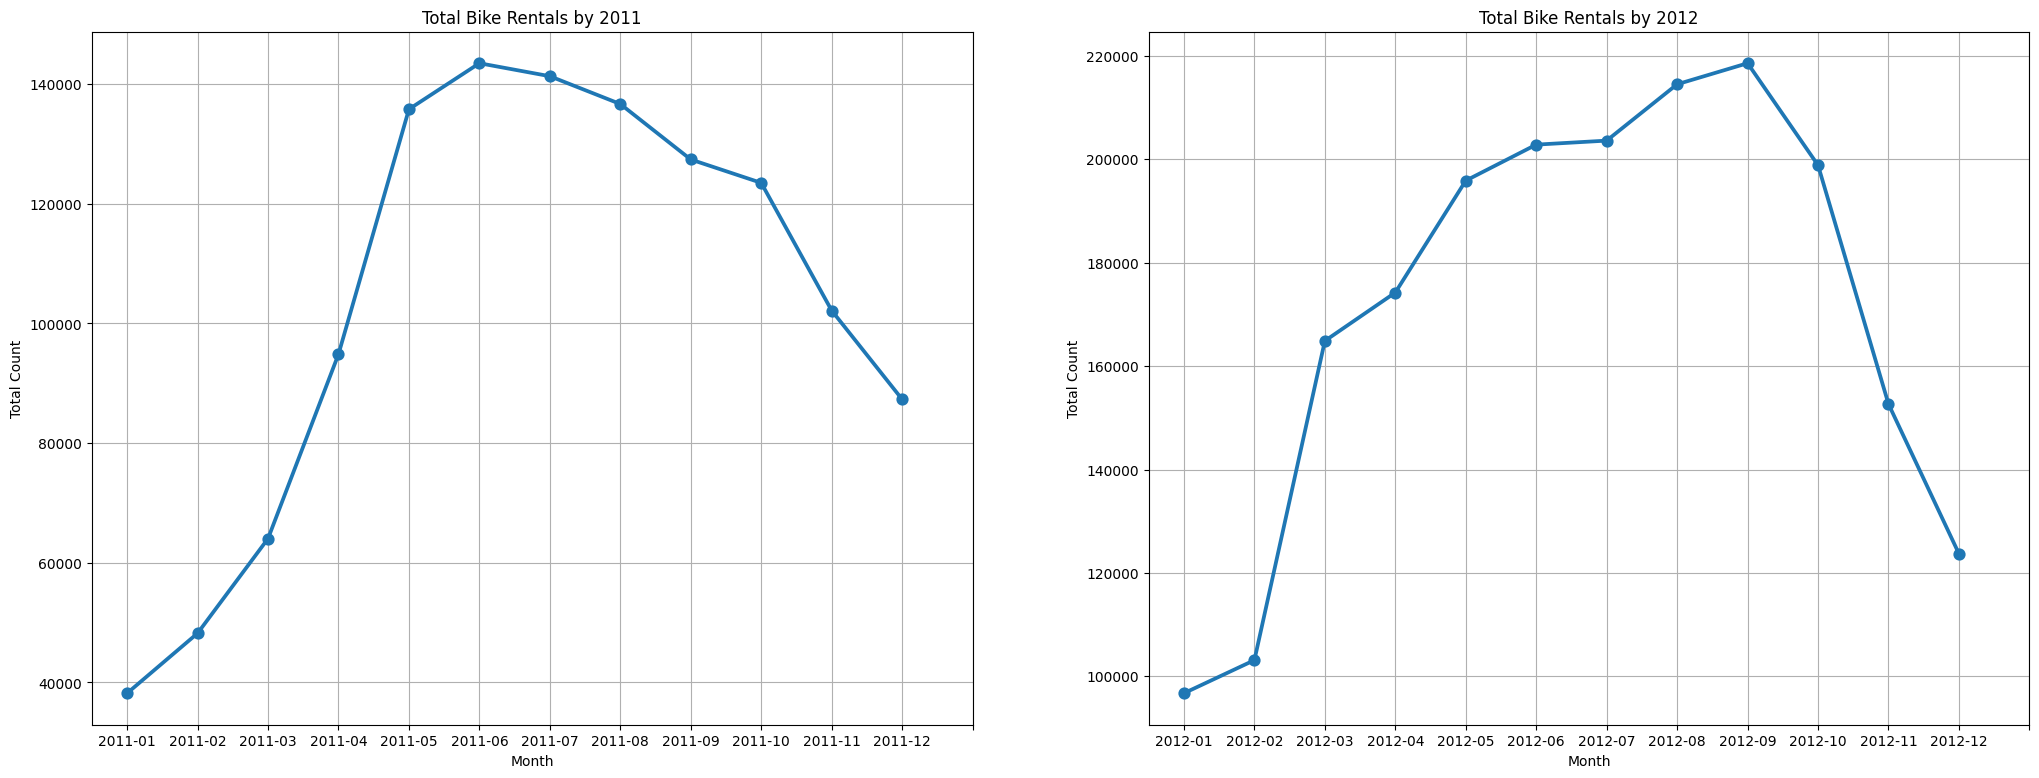

In [152]:
month_order_df_2011 = day_data.resample(rule='M', on='date')['total_count'].sum().reset_index()
month_order_df_2011['date'] = month_order_df_2011['date'].dt.strftime('%Y-%m')
monthly_rentals_2011 = month_order_df_2011[month_order_df_2011['date'].str.startswith('2011')]
print(monthly_rentals_2011)

month_order_df_2012 = day_data.resample(rule='M', on='date')['total_count'].sum().reset_index()
month_order_df_2012['date'] = month_order_df_2012['date'].dt.strftime('%Y-%m')
monthly_rentals_2012 = month_order_df_2012[month_order_df_2012['date'].str.startswith('2012')]
print(monthly_rentals_2012)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 9))

# Visualisasi tren total penyewaan sepeda berdasarkan tahun 2011
sns.pointplot(x='date', y='total_count', data=monthly_rentals_2011, errorbar=None, ax=axes[0])
axes[0].set_title('Total Bike Rentals by 2011')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Count')
axes[0].set_xticks(range(0, 13))
axes[0].grid(True)

# Visualisasi tren total penyewaan sepeda berdasarkan tahun 2012
sns.pointplot(x='date', y='total_count', data=monthly_rentals_2012, errorbar=None, ax=axes[1])
axes[1].set_title('Total Bike Rentals by 2012')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Count')
axes[1].set_xticks(range(0, 13))
axes[1].grid(True)

# Menampilkan plot
plt.show()

Dapat dilihat kedua grafik diatas menunjukkan yaitu
- Pada tahun 2011 dari bulan januari sampai bulan juni mengalami kenaikan dan penyewaan tertinggi terjadi pada bulan Juni yaitu 143512 penyewaan
- Pada tahun 2012  dari bulan januari sampai september mengalami kenaikan dan penyewaan tertinggi terjadi pada bulan September yaitu 218573 penyewaan

## Conclusion

- Pertanyaan 1 : Hari apa yang paling banyak terjadi penyewaan sepeda?
- Pertanyaan 2 : Pada kondisi cuaca apa rata-rata penyewaan sepeda paling banyak terjadi?
- Pertanyaan 3 : Pada musim apa rata-rata penyewaan sepeda paling banyak terjadi?
- Pertanyaan 4 : Pada jam berapa paling banyak terjadi penyewaan sepeda?
- Pertanyaan 5 : Bagaimana tren total penyewaan sepeda berubah setiap bulan pada tahun 2011 dan 2012?

- Conclution pertanyaan 1 : Hari yang paling banyak terjadi penyewaan sepeda adalah hari "Jumat" dengan jumlah 487790 penyewaan
- Conclution pertanyaan 2 : Cuaca dengan rata rata penyewaan tertinggi yaitu pada cuaca "Clear" dengan rata rata sebesar 4876.78
- Conclution pertanyaan 3 : Musim dengan rata rata penyewaan tertinggi yaitu pada musim "Fall" dengan rata rata sebesar 5644.30
- Conclution Pertanyaan 4 : Jam dengan penyewaan terbanyak pada jam 17.00 dengan jumlah 336860 penyewaan
- Conclution Pertanyaan 5 :
  - Pada tahun 2011 dari bulan januari sampai bulan juni mengalami kenaikan dan penyewaan tertinggi terjadi pada bulan Juni yaitu 143512 penyewaan
  - Pada tahun 2012 dari bulan januari sampai september mengalami kenaikan dan penyewaan tertinggi terjadi pada bulan September yaitu 218573 penyewaan

## Analysis RFM

In [153]:
rfm_df = day_data.groupby(by="weekday", as_index=False).agg({
    "date": "max", # mengambil tanggal order terakhir
    "record_index": "nunique", # menghitung jumlah order
    "total_count": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["weekday", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day_data["date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
print(rfm_df)


     weekday  frequency  monetary  recency
0     Sunday        105    444027        1
1     Monday        105    455503        0
2    Tuesday        104    469109        6
3  Wednesday        104    473048        5
4   Thursday        104    485395        4
5     Friday        104    487790        3
6   Saturday        105    477807        2


In [154]:
rfm_df2 = day_data.groupby(by="month", as_index=False).agg({
    "date": "max", # mengambil tanggal order terakhir
    "record_index": "nunique", # menghitung jumlah order
    "total_count": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df2.columns = ["month", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df2["max_order_timestamp"] = rfm_df2["max_order_timestamp"].dt.date
recent_date = day_data["date"].dt.date.max()
rfm_df2["recency"] = rfm_df2["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df2.drop("max_order_timestamp", axis=1, inplace=True)
print(rfm_df2)

        month  frequency  monetary  recency
0     January         62    134933      335
1    February         57    151352      306
2       March         62    228920      275
3       April         60    269094      245
4         May         62    331686      214
5        June         60    346342      184
6        July         62    344948      153
7      August         62    351194      122
8   September         60    345991       92
9     October         62    322352       61
10   November         60    254831       31
11   December         62    211036        0
